# Problem 12.6

**Least squares equalizer design.** (See exercise 7.15.) 
You are given a channel impulse response, the n-vector c. Your job is to find an equalizer impulse response, the n-vector h, that minimizes ||h*c − e1||^2 . 

You can assume that c1 != 0. 
Remark: h is called an equalizer since it approximately inverts, or undoes, convolution by c.

- Explain how to find h. 
- Apply your method to find the equalizer h for the channel c = (1.0, 0.7, −0.3, −0.1, 0.05). 
- Plot c, h, and h ∗ c.

We know that the convolution c * h = h * c is a linear function of h and can be written as a matrix - vector product : c * h = T(c)h; where T(c) is the Toeplitz matrix.
Here, m = n so the matrix has size (2n−1)×n

Therefore ||c * h - e1||^2 = ||T(c)h − e1||^2 and we can find "h" by solving the least square problem of minimizing: **||T(c)h - e1||^2**

In [61]:
function toeplitz_function(l_x, y)
    l_y = length(y)
    l_z = l_x + l_y - 1

    T_y = zeros(Float64,l_z,l_x)

    for n = 1:l_x
        for m = n:l_z
            o = m - n + 1
            
            if (o <= l_y)
                T_y[m,n] = y[o]
            end
        end
    end
    return T_y
end

toeplitz_function (generic function with 1 method)

In [62]:
c = [1.0, 0.7, -0.3, -0.1, 0.05]

length_of_h = 5;

T_c = toeplitz_function(length_of_h,c);

In [63]:
e1 = zeros(9) 
e1[1] = 1

1

Now to find approx h, we need to find least square solution of h which is {inverse of T(c)}.e1. 

The solution of h is : 

In [64]:
h = T_c \ e1 

5-element Array{Float64,1}:
  0.9214015838276353 
 -0.5521876169295151 
  0.5573851982305564 
 -0.33847254425948153
  0.19274372830178774

#### The convolution with the channel impulse response is 

In [65]:
result = T_c * h

9-element Array{Float64,1}:
  0.9214015838276353  
  0.09279349174982954 
 -0.10556660876839469 
  0.12521322119799896 
 -0.11011377126468294 
  0.15311447241956444 
  0.003893395846939658
 -0.03619800004315285 
  0.009637186415089387

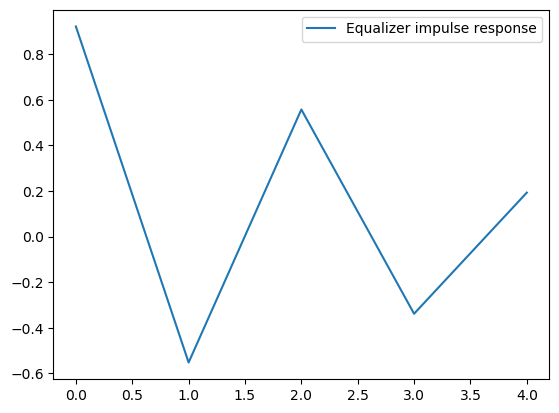

PyObject <matplotlib.legend.Legend object at 0x1483734e0>

In [66]:
using PyPlot
plot(h,label = "Equalizer impulse response")
legend()

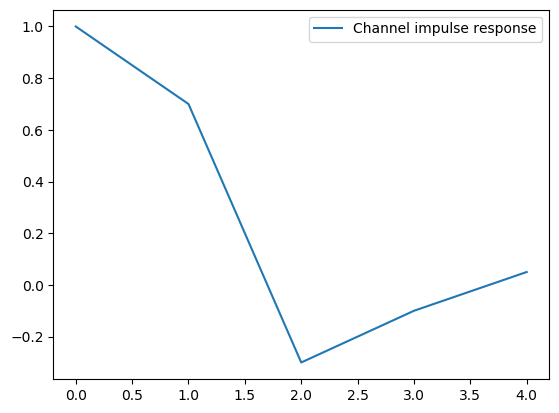

PyObject <matplotlib.legend.Legend object at 0x1482336a0>

In [67]:
plot(c, label = "Channel impulse response")
legend()

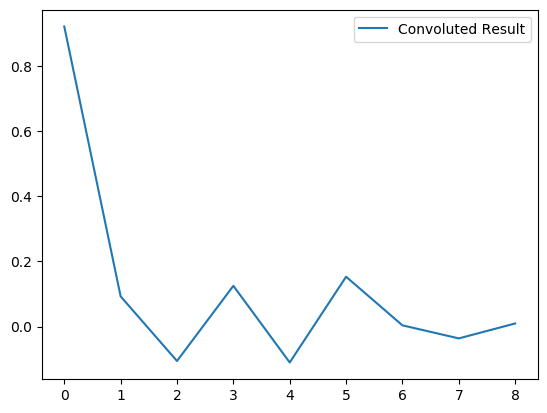

PyObject <matplotlib.legend.Legend object at 0x14837d5c0>

In [68]:
plot(result, label = "Convoluted Result") 
legend() 

## Problem 13.3

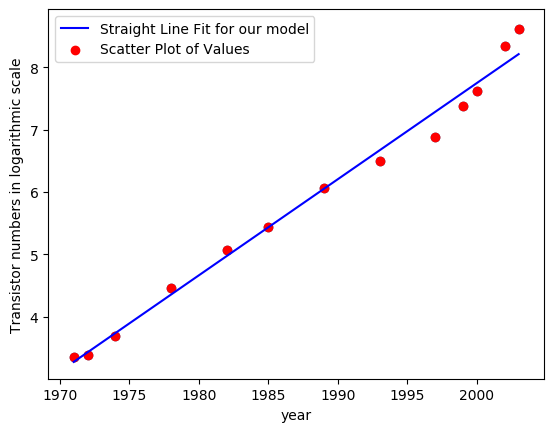

15.337601234013963

In [4]:
data_set = [2250,2500,5000,29000,120000,275000,1180000,3100000,7500000,24000000,42000000,220000000, 410000000]
year = [1971,1972,1974,1978,1982,1985,1989,1993,1997,1999,2000,2002,2003] 

using PyPlot 
data_set_in_log_scale = zeros(length(data_set)) 
for n in 1:length(data_set) 
    data_set_in_log_scale[n] = log(10,data_set[n]) 
end 

scatter(year,data_set_in_log_scale) 
xlabel("Year") 
ylabel("Number of Transistors in log scale") 


Now create the A Matrix of size 9 x2 which will store the values corresponding to the two basis functions across 13 data sets.

In [70]:
mat_A = ones(length(data_set),2)

for n in 1:length(data_set)
    mat_A[n,2] = year[n] - 1970;
end

theta = mat_A \ data_set_in_log_scale

2-element Array{Float64,1}:
 3.1255926338293465
 0.1540181798438225

#### Compute RMS

In [71]:
function rms(mat_A)
    s = 0.0
    for a in mat_A
        s += a * a
    end
    return sqrt(s / length(mat_A))
end

rms (generic function with 1 method)

In [72]:
predicted_result = mat_A * theta 
error_rms = data_set_in_log_scale - predicted_result 
rms(error_rms) 

0.20307668716659033

#### This means that we can expect our prediction of log10 N to typically be off by around 0.20. This corresponds to a prediction typically off by around a factor of 10^(0.2) = 1.6.

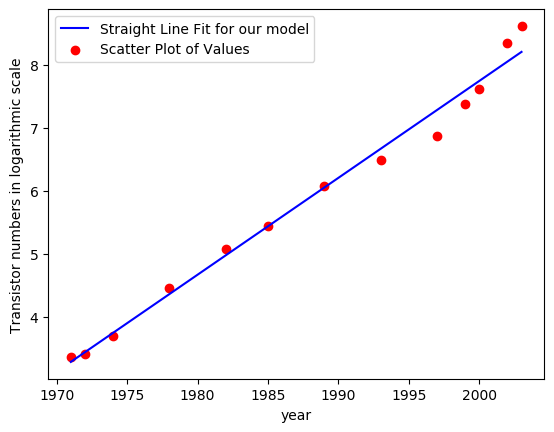

PyObject <matplotlib.legend.Legend object at 0x14d386470>

In [73]:
scatter(year,data_set_in_log_scale, label = "Scatter Plot of Values",color = :red)
plot(year,predicted_result, label = "Straight Line Fit for our model", color = :blue) 
xlabel("year") 
ylabel("Transistor numbers in logarithmic scale") 
legend() 


#### Now we are going to test our model for IBM Z13 microprocessor realeased in 2015, which had 4*10^9 transistors.

In [50]:
y_orig = 4000000000;
y_orig_log = log(10,y_orig)

basis_y = [1,2015-1970]

y_predict_log = transpose(basis_y) * theta
y_predict = 10 ^ y_predict_log
y_predict_log - y_orig_log

0.45435073547339755

#### b) We  see the model performs poorly on the test data of IBM Z13 for the year 2015.  There is a 45% error, or the prediction is astray by a factor of 3.


#### c)In our model the number of transistors doubles approximately every log10 2/θ_2 = 1.95 years, which is consistent with Moore’s law. As we see, in 30 years, the number of transistors got doubled 15 times. That resembles Moore’s law, as the number of transistors gets doubled every two years.

In [52]:
log(2,y_predict/data_set[6])

15.337601234013963

## 12.12

#### Solve the least squares placement problem for the specific problem with N = 10, K=4, L=13,fixed locations p7 =(0,0),p8 =(0,1),p9 =(1,1),p10 =(1,0),and edges(1, 3),(1, 4),(3, 4),(1, 7),(3, 5),(2, 3),(4, 6),(2, 5),(5, 6),(2, 8),(6, 9),(2, 9),(6, 10). 

#### Plot the locations, showing the graph edges as lines connecting the locations.

Incidence Matrix P

In [75]:
p  = zeros(Int64, 10, 13)
points = [1 3; 1 4; 3 4; 1 7; 3 5; 2 3; 4 6; 2 5; 5 6; 2 8; 6 9; 2 9; 6 10]

col = 1

for i in 1:13
    p[points[i, 1], col] = 1
    p[points[i, 2], col] = -1
    col = col + 1
end
p

10×13 Array{Int64,2}:
  1   1   0   1   0   0   0   0   0   0   0   0   0
  0   0   0   0   0   1   0   1   0   1   0   1   0
 -1   0   1   0   1  -1   0   0   0   0   0   0   0
  0  -1  -1   0   0   0   1   0   0   0   0   0   0
  0   0   0   0  -1   0   0  -1   1   0   0   0   0
  0   0   0   0   0   0  -1   0  -1   0   1   0   1
  0   0   0  -1   0   0   0   0   0   0   0   0   0
  0   0   0   0   0   0   0   0   0  -1   0   0   0
  0   0   0   0   0   0   0   0   0   0  -1  -1   0
  0   0   0   0   0   0   0   0   0   0   0   0  -1

In [80]:
# Creating block matrix b

p_transpose = transpose(p)
p_0 = p_transpose[:, 1:6]
p_1 = p_transpose[:, 7:10]

zero_fixed = zeros(Float64, 13, 4)

B = [p_1 zero_fixed; zero_fixed p_1]

26×8 Array{Float64,2}:
  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
 -1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
  0.0  -1.0   0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0  -1.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0  -1.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0  -1.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0  -1.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0

In [82]:
x_coordinates_fix = [0, 0, 1.0, 1.0]
y_coordinates_fix = [0, 1.0, 1.0, 0]

x_tilda = [x_coordinates_fix; y_coordinates_fix]

b = -B*x_tilda 

26-element Array{Float64,1}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 1.0
 1.0
 1.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 1.0
 1.0
 1.0
 0.0

In [84]:
initial_zero = zeros(Float64, 13, 6)
A = [p_0 initial_zero; initial_zero p_0]
x = A\b

12-element Array{Float64,1}:
 0.35531135531135527
 0.5311355311355311 
 0.5128205128205128 
 0.553113553113553  
 0.6117216117216117 
 0.7912087912087912 
 0.3479853479853479 
 0.7985347985347985 
 0.5641025641025639 
 0.4798534798534799 
 0.6300366300366299 
 0.5274725274725275 

Create matrix of points and their coordinates for graph plotting

In [87]:
points_on_graph = zeros(Float64, 10, 2)

for i in 1:6
    points_on_graph[i, 1] = x[i]
    points_on_graph[i, 2] = x[i+6]
end

for i in 1:4
    points_on_graph[i+6, 1] = x_tilda[i]
    points_on_graph[i+6, 2] = x_tilda[i+4]
end

points_on_graph

10×2 Array{Float64,2}:
 0.355311  0.347985
 0.531136  0.798535
 0.512821  0.564103
 0.553114  0.479853
 0.611722  0.630037
 0.791209  0.527473
 0.0       0.0     
 0.0       1.0     
 1.0       1.0     
 1.0       0.0     

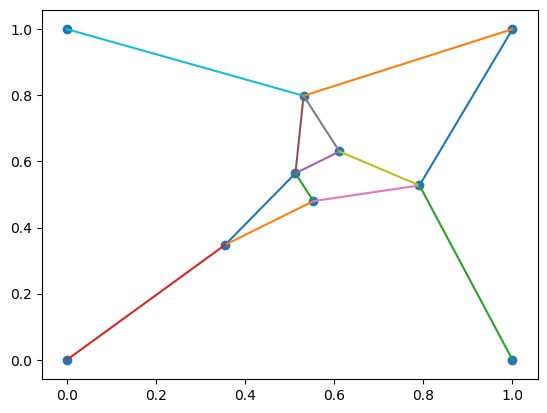

In [88]:
x_points = points_on_graph[:, 1]
y_points = points_on_graph[:, 2]

using PyPlot
scatter(x_points, y_points)

for i in 1:13
    p1 = points[i, 1]
    p2 = points[i, 2]
    
    plot([x_points[p1], x_points[p2]], [y_points[p1], y_points[p2]])
end

## 14.7

 Resolving package versions...
  Updating `~/.julia/environments/v1.3/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.3/Manifest.toml`
 [no changes]
 Resolving package versions...


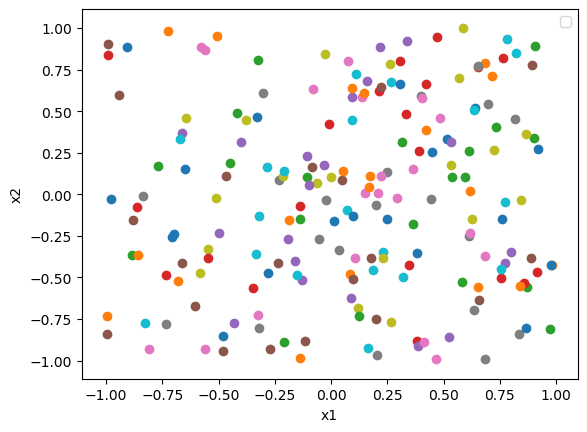

  Updating `~/.julia/environments/v1.3/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.3/Manifest.toml`
 [no changes]


No handles with labels found to put in legend.


PyObject <matplotlib.legend.Legend object at 0x153dbcd90>

In [3]:
import Pkg
Pkg.add("Distributions")

import Distributions: Normal
import Distributions: Truncated
Pkg.add("PyPlot")

using PyPlot

Mu = 0
Sigma = 1 
lower_bound = -1
upper_bound = 1 

D = Truncated(Normal(Mu, Sigma), lower_bound, upper_bound) 
Mat_X = rand(D,2,200)

for i in 1:200
    scatter(Mat_X[1,i],Mat_X[2,i])
end
xlabel("x1")
ylabel("x2")
legend()

In [91]:
Y = zeros(Int64,200)

for i in 1:200
    Y[i] = Mat_X[1,i]*Mat_X[2,i] >= 0 ? 1 : -1
end

In [92]:
function func(A)
    return [1, A[1], A[2], A[1]^2, A[1]*A[2], A[2]^2]
end

Mat_A = zeros(200,6)
for i in 1:200
    Mat_A[i,:] = func(Mat_X[:,i])
end

In [94]:
theta_val = Mat_A\Y

predict_Y = Mat_A * theta_val

binary_Y = zeros(Int64,200)

for i in 1:200
    binary_Y[i] = predict_Y[i] >= 0 ? 1 : -1
end

no_false = 0

for i in 1:200
    no_false = binary_Y[i] != Y[i] ? no_false+1 : no_false
end
rate_error = no_false/200

0.035

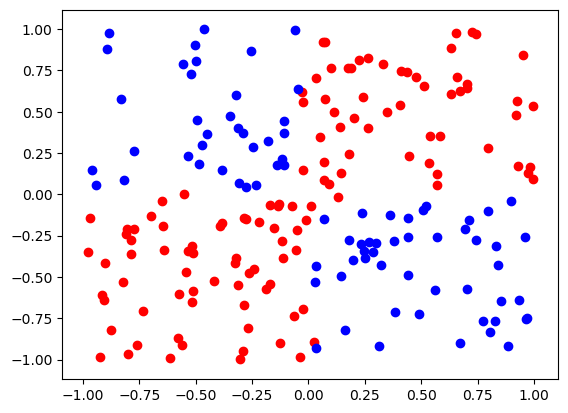

In [95]:
for i in 1:200
    if (binary_Y[i] == 1)
        scatter(Mat_X[1,i],Mat_X[2,i], color = :red)
    else
        scatter(Mat_X[1,i],Mat_X[2,i], color = :blue)
    end
end

In [96]:
theta_val

6-element Array{Float64,1}:
  0.0188657420548852  
 -0.019491940349999588
  0.00218677813556701 
 -0.029865881417048372
  2.273281416243867   
  0.06421955162767594 

##### Thus we see that the 5th theta has the highest weightage. And this should be obvious as the 5th basis function is x1*x2 and this is the correct classification. 